In [1]:
#Loading needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)

In [2]:
#Loading dataset...
df_train = pd.read_csv("C:/Users/HP PC/Desktop/work/house-prices-advanced-regression-techniques/train.csv")

In [3]:
#Visualizing the data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Checking for the shape of the data
df_train.shape

(1460, 81)

The data has *1460* rows and 81 columns

*EXPLORATORY DATA ANALYSIS*

1.Missing Values
2.Numerical Variables
3.Categorical Variables
4.Cardinality of Categorical Variables
5.Outliers
6.Distribution of Numerical Variables
7.Relationship between independent and dependent features

In [5]:
#Missing Values
Total = df_train.isnull().sum().sort_values(ascending=False)
Percent_missing = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100 
missing_data = pd.concat([Total,Percent_missing],axis=1, keys=["Total","Percent_missing"])
missing_data.head(20)

,Total,Percent_missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


From the table above, we can see that some of the features have extremely high number of missing values,
Features like - PoolQC
              - MiscFeature
              -Alley
              -Fence
It is advisable to drop this features as it would affect the model.
Other features are worth looking at, their relationship with "*SalePrice*" will help decide how to handle 
them

In [6]:
#Dropping some of the features with missing values
df_train.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1,inplace=True)

In [7]:
df_train.drop(["LotFrontage","FireplaceQu"],axis=1,inplace=True)

NUMERICAL FEATURES

In [8]:
num_ftrs = [features for features in df_train.columns if df_train[features].dtypes != "O"]
print("There are {} numerical features in the dataset".format(len(num_ftrs)))
num_ftrs

There are 37 numerical features in the dataset


['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

One thing evident about this dataset is how similar how some of the features are, It is
important to identify them as they would be a problem in the training of the model

To identify datasets like that we would be going through the "feature description"

After careful analysis, I noticed that 
1.) YearRemodAdd and YearBuilt

In [9]:
#Dropping YearRemodAdd
df_train.drop(["YearRemodAdd"],axis=1,inplace=True)

The "Id" column provides no information about this dataset so we need to drop it

In [10]:
df_train.drop(["Id"],axis=1,inplace=True)

Before we start exploring each of the features, based on intuition(i.e features that would be considered 
by a person before buying). This features are
1.)Year_built
2.)OverallQual

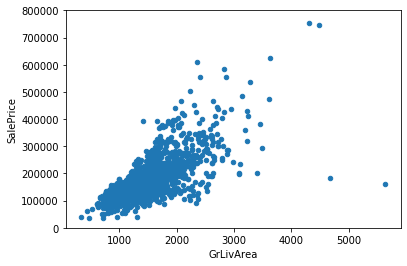

In [11]:
#Scatter Plot of GrLivingArea vs SalePrice
var = "GrLivArea"
data = pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
data.plot.scatter(x=var, y ="SalePrice",ylim=(0,800000));

From the looks of it, GrLivArea has a strong linear relationship with the price of the buildings, so for most of the data points
the Price of the building will increase as GrLivArea increases. This is good information that it is an important feature,
calculating the correlation between the 2 variables can give us more information.

The common real estate knowledge is that the value of properties appreciates as they become older.
So now I will be checking to see the relationship it has with the Price of the building

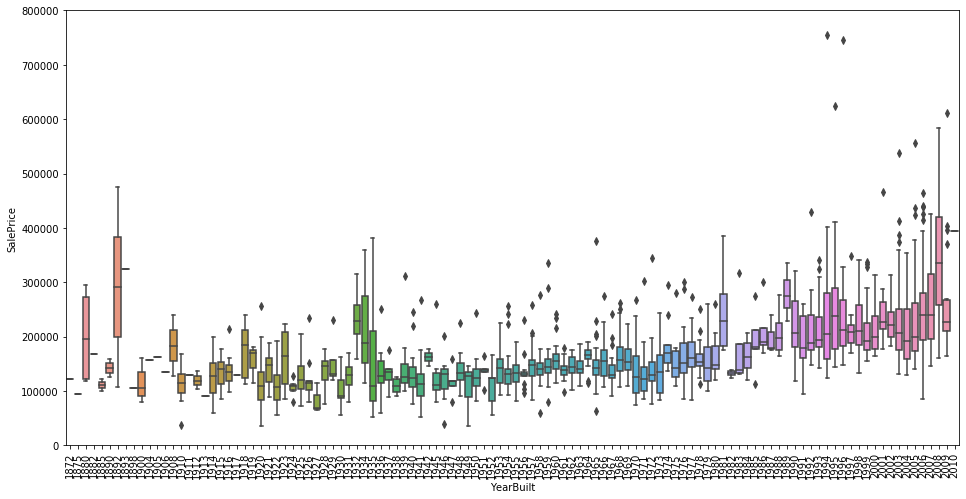

In [12]:
var1 = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var1]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var1, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Text(0.5, 1.0, 'House Price vs Year Built')

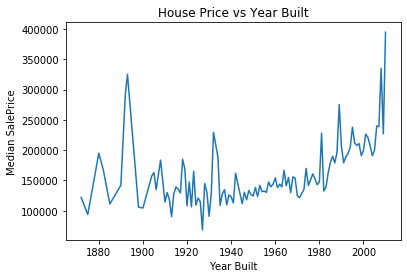

In [13]:
data.groupby("YearBuilt")["SalePrice"].median().plot()
plt.xlabel("Year Built")
plt.ylabel("Median SalePrice")
plt.title("House Price vs Year Built")

From the graphs above I would say that a person willing to buy a house is likely to spend more on new houses
compared to old houses.

Let's look at how the quality of the houses affect the pricing.

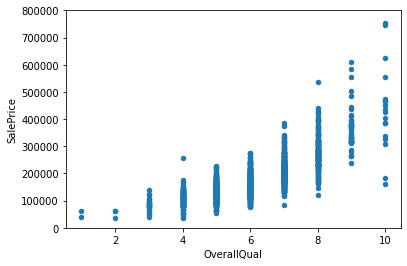

In [14]:
#Scatter Plot of GrLivingArea vs SalePrice
var2 = "OverallQual"
data = pd.concat([df_train["SalePrice"],df_train[var2]],axis=1)
data.plot.scatter(x=var2, y ="SalePrice",ylim=(0,800000));

Text(0.5, 1.0, 'House Price vs OverallQual')

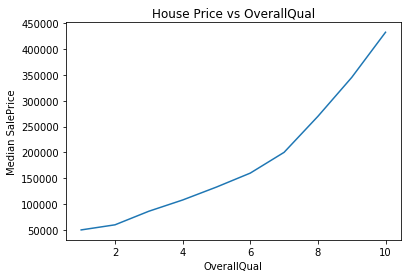

In [15]:
data.groupby("OverallQual")["SalePrice"].median().plot()
plt.xlabel("OverallQual")
plt.ylabel("Median SalePrice")
plt.title("House Price vs OverallQual")

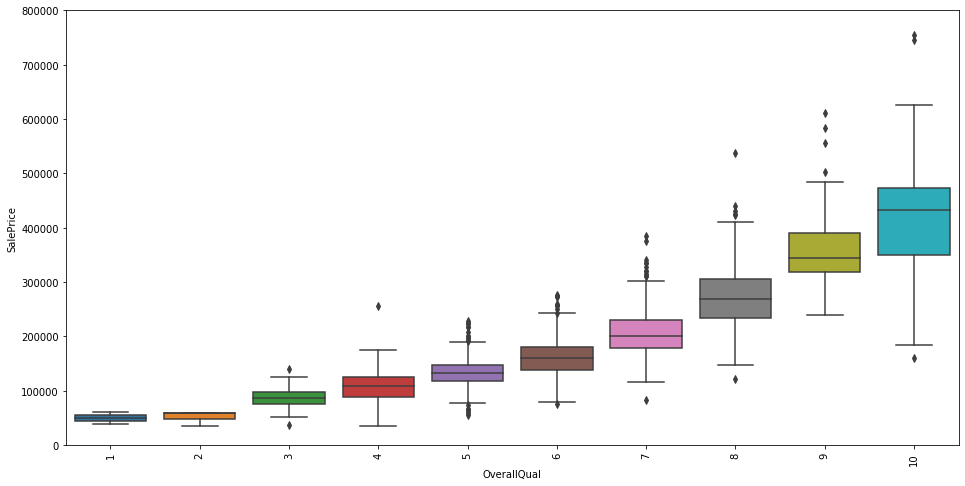

In [16]:
var2 = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var2]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var2, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

The Graphs above show the evidence of a strong trend that as the quality improves the pricing increases.

After working on Intuition that 1.) the older the house the more expensive 2.) The increase in overall quality would make the pricing of the houses increase. It is important to see what some statistical metrics to better understand the data

In [17]:
corr_matrix = df_train.corr()

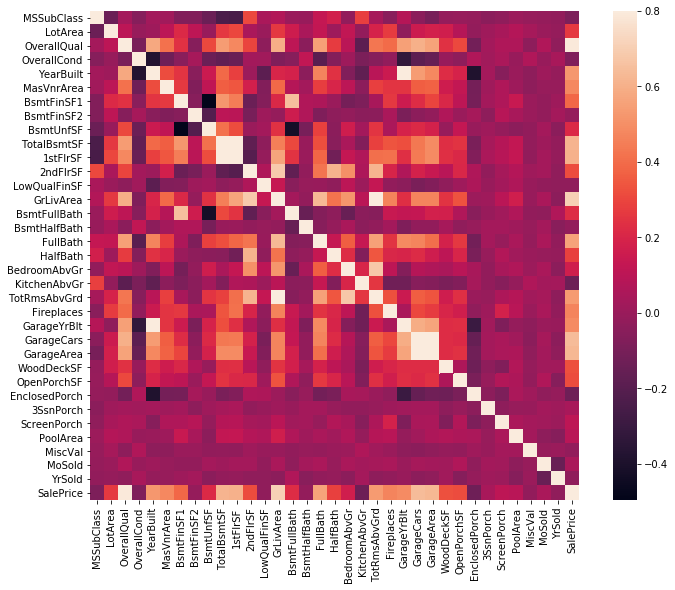

In [18]:
f,ax = plt.subplots(figsize= (12,9))
sns.heatmap(corr_matrix, vmax=.8,square=True);

From the Heatmap above we can see that the correlation with the SalePrice is strongest at 
1.)OverallQual
2.)YearBuilt
3.)TotalBsmtSF
4.)1stFlrSF
5.)GrLivArea
6.)GarageYrBlt
7.)GarageCars
8.)GarageArea



With this, it is worth looking deeper at this variables with high correlation to SalePrice.

Heatmaps are very good at visualizing how relevant the features are in a dataset

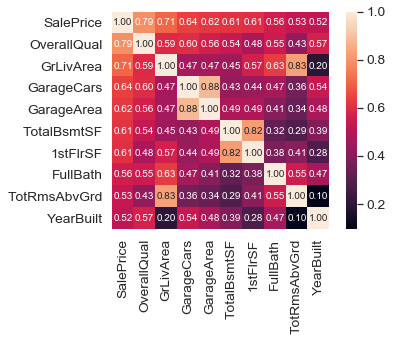

In [19]:
#Looking deeper into the heatmap
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.254)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We already looked at some of this values initially and their correlation coefficients is further proof that they 
have a strong relationship with the